# Homework #2
Please turn this homework in using a GitHub pull request comment to your TA. You will want to start with a new branch (independent of your lab branches).



1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

When rolling 2 six-sided dice, there is only one way to get snake eyes by rolling 1 for both dice (the probability is $ \frac{1}{36}$).
And there are more ways to roll sevens, we can get 7 by rolling 1 and 6, 2 and 5, 3 and 4, 4 and 3, 5 and 2, 6 and 1. the probability to roll 7 is $\frac{6}{36}=\frac{1}{6}$.
The ratio of the probabilities is 1:6

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

Analytically (math & counting):


$$P_2=\frac{1}{36},P_3=\frac{2}{36},P_4=\frac{3}{36},P_5=\frac{4}{36},P_6=\frac{5}{36},P_7=\frac{6}{36},P_8=\frac{5}{36},P_9=\frac{4}{36},P_{10}=\frac{3}{36},P_{11}=\frac{2}{36},P_{12}=\frac{1}{36}$$


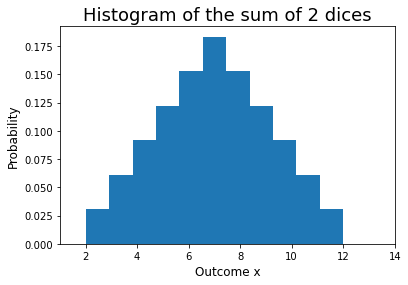

In [57]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import signal

d = np.array([2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,10,11,11,12])
ax=plt.hist(d,density=True,bins=11)
plt.xlim([1,14])
plt.xlabel('Outcome x', size=12)
plt.ylabel('Probability', size=12)
plt.title('Histogram of the sum of 2 dices', size=18)
plt.show()

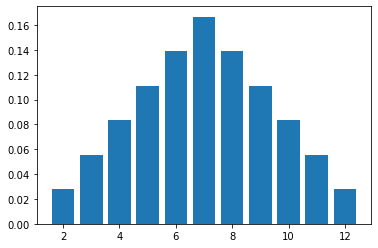

In [58]:
probs =[1/6,1/6,1/6,1/6,1/6,1/6]
sums = scipy.signal.fftconvolve(probs,probs); 
x=np.array([1,2,3,4,5,6]);
n=2;
xmin=x[0]*n;
xmax=x[len(x)-1]*n
x1=np.arange(xmin,xmax+1)
ax=plt.bar(x1,sums);
plt.show()

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [59]:
mean=0
for i in range(len(x1)):
    mean=mean+x1[i]*sums[i]
print('the mean is',mean)


the mean is 7.0


In [60]:
var=0
for i in range(len(x1)):
    var=var+((x1[i]-mean)**2)*sums[i]
print('the variance is ',var)

the variance is  5.833333333333334


4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

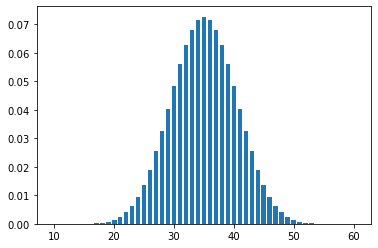

In [61]:
prob =[1/6,1/6,1/6,1/6,1/6,1/6]
sums2 = scipy.signal.fftconvolve(prob,prob); 
sums4 = scipy.signal.fftconvolve(sums2,sums2); 
sums8= scipy.signal.fftconvolve(sums4,sums4);
sums10=scipy.signal.fftconvolve(sums8,sums2);
x=np.array([1,2,3,4,5,6]);
n=10
xmin=x[0]*n;
xmax=x[len(x)-1]*n
x1=np.arange(xmin,xmax+1)
ax=plt.bar(x1,sums10)
plt.show()

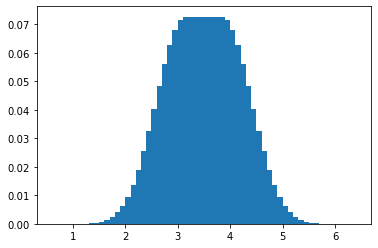

In [62]:
avg=x1/n;
ax=plt.bar(avg,sums10)
plt.show()

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.